# Analisis Semantik Fasttext

In [1]:
# import Library
import os
import time
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from jcopml.utils import save_model, load_model
from string import punctuation

from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec, FastText
import gensim
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from src.topic_semantic import TopicSemanticEvolvingDynamic, rename_columns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Load Data

In [2]:
df_cluster_ft = pd.read_csv('data/hasil_cluster_fasttext_menggunakan_stopwords.csv')
df_centroid_ft = pd.read_csv('data/centroid_fasttext_menggunakan_stopwords.csv')
df_topic_prob = pd.read_excel('data/topic_prob.xlsx', engine='openpyxl')
df_topic_word = pd.read_excel('data/topic_word.xlsx', engine='openpyxl')
df_intensity = pd.read_excel('data/intensity_by_year.xlsx', engine='openpyxl')
df_top_words = pd.read_excel('data/top_words_each_topic.xlsx', engine='openpyxl')

df_topic_word.rename({'Unnamed: 0':'topic'}, axis=1, inplace=True)
df_topic_prob.rename({'Unnamed: 0':'topic'}, axis=1, inplace=True)

# Topic Semantic Evolving Dynamic

In [3]:
model_TSED = TopicSemanticEvolvingDynamic(df_cluster_ft, df_intensity, df_topic_word, df_topic_prob, 
                                         year_columns='year', 
                                         cluster_columns='cluster', 
                                         topic_year_columns=['topic','year'], 
                                         word_columns='word',
                                         start_extract_columns=2)

In [4]:
df_topic_semantic_ft = model_TSED.create_topic_semantic_dataframe()

In [5]:
df_topic_semantic_ft.head(10)

topic  year   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  \
0      1  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1      2  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2      3  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3      4  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4      5  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5      6  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6      7  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7      8  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8      1  2022 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9      2  2022 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N

In [6]:
df_topic_semantic_ft.shape

(120, 173)

In [7]:
df_topic_semantic_prob_ft, df_topic_semantic_word_ft = model_TSED.topic_semantic_prob_distribution(df_topic_semantic_ft)

Training time: 222.16358041763306s


In [8]:
df_topic_semantic_prob_ft.head(10)

topic  year         0         1         2         3         4         5  \
0      1  2023  0.005416  0.025389  0.010043  0.059805  0.015206  0.000914   
1      2  2023  0.000406  0.008925  0.001779  0.016664  0.002849  0.006176   
2      3  2023  0.012826  0.016229  0.006489  0.001080  0.024018  0.001292   
3      4  2023  0.011098  0.010585  0.002523  0.000772  0.016380  0.002955   
4      5  2023  0.001982  0.013798  0.001690  0.011173  0.007207  0.026844   
5      6  2023  0.023338  0.029381  0.089330  0.003339  0.021540  0.003320   
6      7  2023  0.029293  0.036703  0.030962  0.004669  0.043613  0.010537   
7      8  2023  0.006718  0.006675  0.000804  0.004602  0.001577  0.016360   
8      1  2022  0.001580  0.007133  0.001206  0.033531  0.006431  0.026216   
9      2  2022  0.043644  0.023937  0.034764  0.002442  0.027904  0.000992   

          6         7         8         9        10        11        12  \
0  0.007194  0.003887  0.036001  0.002816  0.000227  0.005694  0.008988   
1  0.005613  0.004908  0.030152  0.002863  0.000341  0.005021  0.021949   
2  0.012926  0.008017  0.038489  0.005031  0.005047  0.015843  0.011534   
3  0.002335  0.045595  0.051489  0.005957  0.053907  0.013117  0.020207   
4  0.010380  0.011812  0.040026  0.005806  0.000443  0.003759  0.016801   
5  0.001032  0.038380  0.063483  0.001765  0.003748  0.037313  0.014192   
6  0.002646  0.001961  0.039349  0.009857  0.000537  0.026044  0.005817   
7  0.000268  0.011997  0.042762  0.007921  0.007976  0.001631  0.037225   
8  0.011251  0.011408  0.031154  0.010303  0.001169  0.002939  0.015770   
9  0.006718  0.002114  0.052840  0.001053  0.001211  0.019029  0.002572   

         13        14        15        16        17        18        19  \
0  0.002826  0.002605  0.000395  0.003156  0.053539  0.000867  0.023107   
1  0.007115  0.002292  0.000072  0.000793  0.014147  0.001660  0.013067   
2  0.009552  0.001210  0.009973  0.000095  0.025304  0.000603  0.012384   
3  0.006580  0.003419  0.007513  0.002519  0.024357  0.004714  0.031618   
4  0.007139  0.000318  0.000055  0.001568  0.025295  0.001837  0.011362   
5  0.007834  0.023677  0.001065  0.007051  0.004107  0.000277  0.044009   
6  0.007465  0.001987  0.000122  0.002508  0.042058  0.002187  0.018671   
7  0.015601  0.000910  0.010230  0.000211  0.015605  0.001755  0.010375   
8  0.006212  0.000832  0.003379  0.000196  0.025851  0.001260  0.009498   
9  0.001699  0.005520  0.000445  0.004280  0.033398  0.003828  0.016493   

         20        21        22        23        24        25        26  \
0  0.006356  0.002427  0.003440  0.015154  0.016931  0.002729  0.002893   
1  0.001498  0.007423  0.000237  0.011622  0.003080  0.002631  0.006996   
2  0.004885  0.001705  0.003961  0.011154  0.010748  0.008190  0.009741   
3  0.004509  0.016751  0.002098  0.005494  0.003123  0.001980  0.001070   
4  0.008208  0.006780  0.001274  0.015908  0.002564  0.003537  0.015134   
5  0.005105  0.029220  0.004356  0.014414  0.017186  0.000557  0.012650   
6  0.012304  0.001852  0.016423  0.014143  0.026247  0.010933  0.010430   
7  0.000268  0.015279  0.000345  0.010682  0.014570  0.000734  0.004607   
8  0.006999  0.005859  0.001453  0.012622  0.005109  0.004244  0.016129   
9  0.028944  0.000110  0.005766  0.010626  0.015447  0.014044  0.006107   

         27        28        29        30        31        32        33  \
0  0.018208  0.000013  0.021237  0.000802  0.000409  0.018306  0.003683   
1  0.004481  0.000017  0.043839  0.000105  0.004952  0.011305  0.003232   
2  0.007855  0.000026  0.010267  0.008480  0.001110  0.025037  0.000672   
3  0.005689  0.000751  0.035496  0.035881  0.000351  0.023392  0.021360   
4  0.009126  0.000414  0.034466  0.001264  0.000791  0.011978  0.002961   
5  0.006082  0.000404  0.016172  0.035075  0.000053  0.005060  0.006950   
6  0.024058  0.000028  0.017852  0.000630  0.000828  0.012442  0.000596   
7  0.004593  0.001576  0.030829  0.000364  0.000134  0.003933  0.0

In [9]:
df_topic_semantic_prob_ft.head(10)

topic  year         0         1         2         3         4         5  \
0      1  2023  0.005416  0.025389  0.010043  0.059805  0.015206  0.000914   
1      2  2023  0.000406  0.008925  0.001779  0.016664  0.002849  0.006176   
2      3  2023  0.012826  0.016229  0.006489  0.001080  0.024018  0.001292   
3      4  2023  0.011098  0.010585  0.002523  0.000772  0.016380  0.002955   
4      5  2023  0.001982  0.013798  0.001690  0.011173  0.007207  0.026844   
5      6  2023  0.023338  0.029381  0.089330  0.003339  0.021540  0.003320   
6      7  2023  0.029293  0.036703  0.030962  0.004669  0.043613  0.010537   
7      8  2023  0.006718  0.006675  0.000804  0.004602  0.001577  0.016360   
8      1  2022  0.001580  0.007133  0.001206  0.033531  0.006431  0.026216   
9      2  2022  0.043644  0.023937  0.034764  0.002442  0.027904  0.000992   

          6         7         8         9        10        11        12  \
0  0.007194  0.003887  0.036001  0.002816  0.000227  0.005694  0.008988   
1  0.005613  0.004908  0.030152  0.002863  0.000341  0.005021  0.021949   
2  0.012926  0.008017  0.038489  0.005031  0.005047  0.015843  0.011534   
3  0.002335  0.045595  0.051489  0.005957  0.053907  0.013117  0.020207   
4  0.010380  0.011812  0.040026  0.005806  0.000443  0.003759  0.016801   
5  0.001032  0.038380  0.063483  0.001765  0.003748  0.037313  0.014192   
6  0.002646  0.001961  0.039349  0.009857  0.000537  0.026044  0.005817   
7  0.000268  0.011997  0.042762  0.007921  0.007976  0.001631  0.037225   
8  0.011251  0.011408  0.031154  0.010303  0.001169  0.002939  0.015770   
9  0.006718  0.002114  0.052840  0.001053  0.001211  0.019029  0.002572   

         13        14        15        16        17        18        19  \
0  0.002826  0.002605  0.000395  0.003156  0.053539  0.000867  0.023107   
1  0.007115  0.002292  0.000072  0.000793  0.014147  0.001660  0.013067   
2  0.009552  0.001210  0.009973  0.000095  0.025304  0.000603  0.012384   
3  0.006580  0.003419  0.007513  0.002519  0.024357  0.004714  0.031618   
4  0.007139  0.000318  0.000055  0.001568  0.025295  0.001837  0.011362   
5  0.007834  0.023677  0.001065  0.007051  0.004107  0.000277  0.044009   
6  0.007465  0.001987  0.000122  0.002508  0.042058  0.002187  0.018671   
7  0.015601  0.000910  0.010230  0.000211  0.015605  0.001755  0.010375   
8  0.006212  0.000832  0.003379  0.000196  0.025851  0.001260  0.009498   
9  0.001699  0.005520  0.000445  0.004280  0.033398  0.003828  0.016493   

         20        21        22        23        24        25        26  \
0  0.006356  0.002427  0.003440  0.015154  0.016931  0.002729  0.002893   
1  0.001498  0.007423  0.000237  0.011622  0.003080  0.002631  0.006996   
2  0.004885  0.001705  0.003961  0.011154  0.010748  0.008190  0.009741   
3  0.004509  0.016751  0.002098  0.005494  0.003123  0.001980  0.001070   
4  0.008208  0.006780  0.001274  0.015908  0.002564  0.003537  0.015134   
5  0.005105  0.029220  0.004356  0.014414  0.017186  0.000557  0.012650   
6  0.012304  0.001852  0.016423  0.014143  0.026247  0.010933  0.010430   
7  0.000268  0.015279  0.000345  0.010682  0.014570  0.000734  0.004607   
8  0.006999  0.005859  0.001453  0.012622  0.005109  0.004244  0.016129   
9  0.028944  0.000110  0.005766  0.010626  0.015447  0.014044  0.006107   

         27        28        29        30        31        32        33  \
0  0.018208  0.000013  0.021237  0.000802  0.000409  0.018306  0.003683   
1  0.004481  0.000017  0.043839  0.000105  0.004952  0.011305  0.003232   
2  0.007855  0.000026  0.010267  0.008480  0.001110  0.025037  0.000672   
3  0.005689  0.000751  0.035496  0.035881  0.000351  0.023392  0.021360   
4  0.009126  0.000414  0.034466  0.001264  0.000791  0.011978  0.002961   
5  0.006082  0.000404  0.016172  0.035075  0.000053  0.005060  0.006950   
6  0.024058  0.000028  0.017852  0.000630  0.000828  0.012442  0.000596   
7  0.004593  0.001576  0.030829  0.000364  0.000134  0.003933  0.0

In [10]:
df_topic_semantic_word_ft.head(10)

topic  year                                                  0  \
0      1  2023  document description overview survey primary c...   
1      2  2023  induced induces stimulation secondary gatherin...   
2      3  2023  qualitative descriptive interview observation ...   
3      4  2023  collected observation descriptive secondary an...   
4      5  2023  analytical collected primary explanation quant...   
5      6  2023  quantitative collection primary collected surv...   
6      7  2023  qualitative interview observation descriptive ...   
7      8  2023  collection quantitative stimulation stimulated...   
8      1  2022  analytical description gathering secondary qua...   
9      2  2022  qualitative interview descriptive collection d...   

                                                   1  \
0  make implemented implement take evaluation pla...   
1  implemented implementation make integrated pro...   
2  program eradication taken conducting take impl...   
3  prevention evaluation selected score taken pre...   
4  selection evaluation made taken score implemen...   
5  score assessment implementation program select...   
6  aspect make implementation making made impleme...   
7  made prepared selectivity selective making pre...   
8  selection selected implemented taking taken ch...   
9  program implementation aspect implementing pla...   

                                                   2  \
0  reading english medium read science understand...   
1  mathematical master understand mathematically ...   
2  practice medium story understand thematic spea...   
3  speaker understood true science speak studying...   
4  basic true cognitive studying science mathemat...   
5  student medium teacher literacy teaching lectu...   
6  writing scientific medium understanding mathem...   
7  studying reader true medium basic scientific r...   
8  cognitive comprehend scientist understood unde...   
9  english practice writing medium scientific und...   

                                                   3  \
0  user node cloud iot monitoring mobile smart tr...   
1  motor vehicle monitoring scenario via remote a...   
2  app free android dense path remote pedestrian ...   
3  monitoring gadget voice android app website vi...   
4  architecture mining automatic database framewo...   
5  website page android app via car path free dat...   
6  road phone architectural via etc away app car ...   
7  free via block route voice smartphone remote r...   
8  node architecture automatic mobile scenario pa...   
9  message framework etc auto voice blog bot plan...   

                                                   4  \
0  development developed help support develop rol...   
1  developed development help assist managed acti...   
2  development developing awareness developed wel...   
3  development intervention role help assist supp...   
4  support developed develop help action role dev...   
5  development developed awareness develop partic...   
6  development role support creation creating dev...   
7  raising assisted helped candidate collaboratio...   
8  developed support help candidate developer rol...   
9  role development awareness assistance particip...   

                                                   5  \
0  propagation photo metric parameter graphic gra...   
1  parameter modified equilibrium calibration mix...   
2  kind equilibrium paragraph propagation scan gr...   
3  incidence brain paragraph staining parameter g...   
4  image parameter modified graph metric camera b...   
5  product kind paragraph equilibrium modified sc...   
6  product modified camera equilibrium mix paragr...   
7  shape parameter product infrared staining mix ...   
8  image metric parameter shape graph camera prop...   
9  kind paragraph sport artwork imagination evasi...   

                                                   6  \
0  field distance first sector second country nea...   
1  field second shading first sector third loc

In [13]:
columns_name_new = rename_columns(df_topic_semantic_prob_ft, start_columns=2)

# rename columns
df_topic_semantic_word_ft.rename(columns_name_new, axis=1, inplace=True)
df_topic_semantic_prob_ft.rename(columns_name_new, axis=1, inplace=True)

In [15]:
df_topic_semantic_word_ft.to_excel('data/topic_semantic_word_ft.xlsx', index=False)
df_topic_semantic_prob_ft.to_excel('data/topic_semantic_prob_ft.xlsx', index=False)

In [16]:
df_topic_semantic_prob_ft_topk, columns_topk_ft, list_topic_ft, topic_results_ft = model_TSED.get_top_cluster(df_topic_semantic_prob_ft, 
                                                                                                              aggregation_func='sum',
                                                                                                              topk=10)

In [17]:
df_topic_semantic_prob_ft_topk.head(10)

topic  year         1         2         3         4         5         6  \
0      1  2023  0.036001  0.021237  0.053539  0.029932  0.023107  0.048375   
1      2  2023  0.030152  0.043839  0.014147  0.040477  0.013067  0.128747   
2      3  2023  0.038489  0.010267  0.025304  0.019340  0.012384  0.001926   
3      4  2023  0.051489  0.035496  0.024357  0.009888  0.031618  0.000746   
4      5  2023  0.040026  0.034466  0.025295  0.031618  0.011362  0.046282   
5      6  2023  0.063483  0.016172  0.004107  0.013761  0.044009  0.016383   
6      7  2023  0.039349  0.017852  0.042058  0.028001  0.018671  0.010463   
7      8  2023  0.042762  0.030829  0.015605  0.008282  0.010375  0.003593   
8      1  2022  0.031154  0.029909  0.025851  0.030761  0.009498  0.055956   
9      2  2022  0.052840  0.006069  0.033398  0.027856  0.016493  0.000530   

          7         8         9        10  
0  0.010043  0.005694  0.032758  0.003887  
1  0.001779  0.005021  0.015081  0.004908  
2  0.006489  0.015843  0.040535  0.008017  
3  0.002523  0.013117  0.022969  0.045595  
4  0.001690  0.003759  0.017446  0.011812  
5  0.089330  0.037313  0.010647  0.038380  
6  0.030962  0.026044  0.022635  0.001961  
7  0.000804  0.001631  0.005944  0.011997  
8  0.001206  0.002939  0.020991  0.011408  
9  0.034764  0.019029  0.028858  0.002114

In [18]:
columns_topk_ft

Index(['topic', 'year', 9, 30, 18, 66, 20, 152, 3, 12, 106, 8], dtype='object')

In [19]:
list_topic_ft

array([1, 2, 3, 4, 5, 6, 7, 8])

In [20]:
topic_results_ft[0]

topic  year         1         2         3         4         5         6  \
0        1  2023  0.036001  0.021237  0.053539  0.029932  0.023107  0.048375   
8        1  2022  0.031154  0.029909  0.025851  0.030761  0.009498  0.055956   
16       1  2021  0.061714  0.008625  0.003999  0.006388  0.071367  0.007934   
24       1  2020  0.032676  0.029182  0.012679  0.016477  0.016194  0.001459   
32       1  2019  0.037364  0.013135  0.051473  0.033972  0.019930  0.032900   
40       1  2018  0.057223  0.031805  0.004920  0.017419  0.014008  0.022057   
48       1  2017  0.040861  0.030696  0.017284  0.016813  0.030971  0.007200   
56       1  2016  0.040571  0.012379  0.024583  0.027427  0.023446  0.017505   
64       1  2015  0.068513  0.015047  0.017965  0.028810  0.045538  0.004101   
72       1  2014  0.031130  0.009793  0.027168  0.033553  0.025108  0.012985   
80       1  2013  0.055997  0.028033  0.007756  0.017750  0.028960  0.017477   
88       1  2012  0.070211  0.011583  0.011240  0.008983  0.069013  0.009012   
96       1  2011  0.037670  0.039568  0.012338  0.016332  0.016996  0.006244   
104      1  2010  0.048370  0.043232  0.017891  0.016192  0.011338  0.017838   
112      1  2009  0.053497  0.053893  0.028820  0.029886  0.026421  0.012710   

            7         8         9        10  
0    0.010043  0.005694  0.032758  0.003887  
8    0.001206  0.002939  0.020991  0.011408  
16   0.002349  0.107890  0.005403  0.035167  
24   0.002336  0.009085  0.012069  0.028783  
32   0.007851  0.006167  0.042342  0.009471  
40   0.167902  0.011476  0.008728  0.043560  
48   0.000268  0.028281  0.012036  0.055531  
56   0.000690  0.030885  0.023690  0.006232  
64   0.010422  0.016413  0.018509  0.010884  
72   0.003792  0.026215  0.027833  0.006132  
80   0.137177  0.006504  0.011492  0.033763  
88   0.002457  0.093135  0.009902  0.039061  
96   0.001004  0.004205  0.012414  0.005582  
104  0.000503  0.005218  0.017554  0.007812  
112  0.003132  0.042053  0.020664  0.012711

In [21]:
# save topic cluster 
for i in range(len(topic_results_ft)):
    topic_results_ft[i].to_excel('data/topic_cluster_ft'+'_'+str(i+1)+'.'+'xlsx', index=False)

## Visualize Topic 1 - 8 With Cluster Semantic

/home/jovyan/ayuugm2023_gmail.com/my_env/disertasi/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




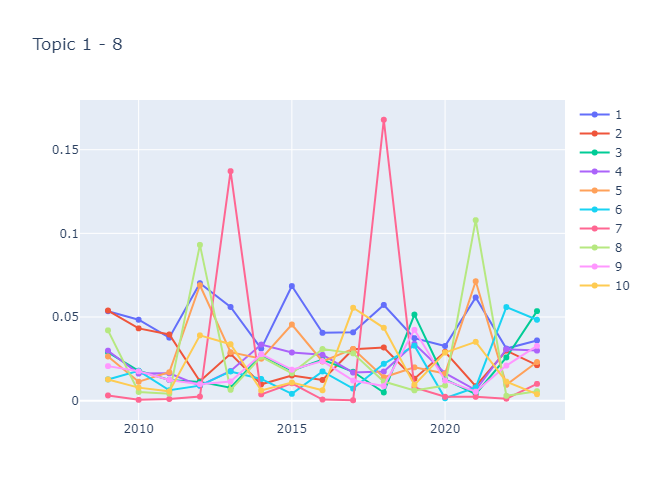

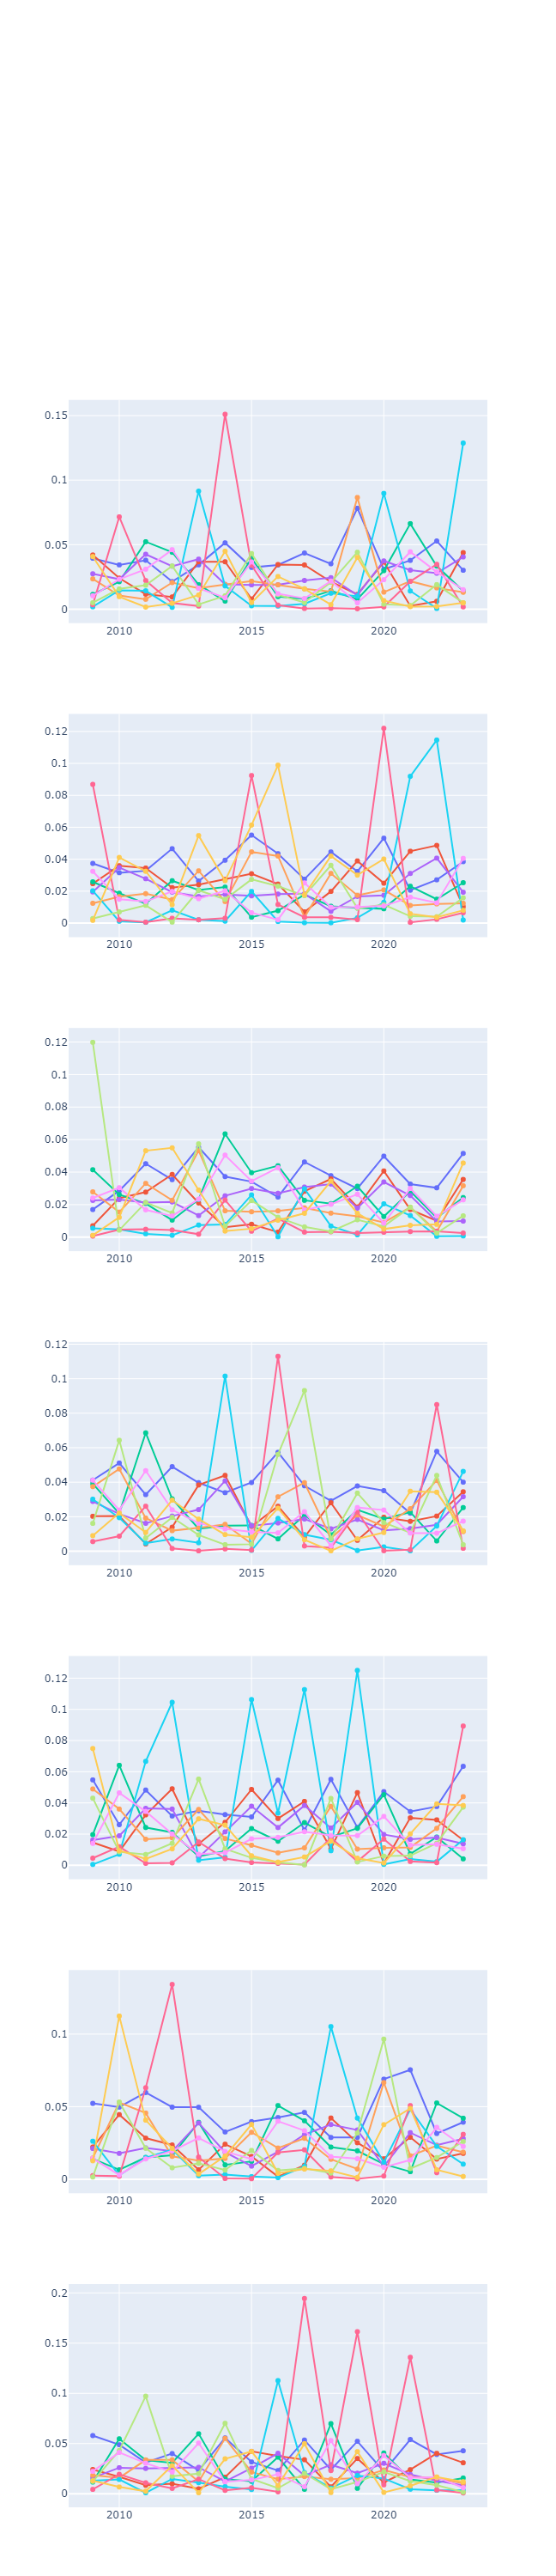

In [22]:
model_TSED.visualize_semantic(df_topic_semantic_prob_ft_topk, list_topic_ft, topic_results_ft)

## Visualize Coefisien Topic and Cluster Semantic 

In [23]:
coef_model_ft = model_TSED.evolving_dynamics(topic_results_ft)

In [24]:
coef_model_ft.rename(rename_columns(coef_model_ft, 1), axis=1, inplace=True)
coef_model_ft.index = np.arange(1, len(coef_model_ft) + 1)

In [37]:
coef_model_ft

topic         1         2         3         4         5         6  \
1      1 -0.001025 -0.001350  0.000967  0.000259 -0.000134  0.001872   
2      2  0.000693 -0.000404  0.000198  0.000016  0.000703  0.003222   
3      3 -0.000188  0.000159 -0.000304  0.000083 -0.000326  0.003613   
4      4  0.000659  0.000513 -0.000847 -0.000247 -0.001052  0.000209   
5      5 -0.000337  0.000192 -0.001573 -0.000485 -0.000515 -0.000539   
6      6  0.000461 -0.000039 -0.001060 -0.000274 -0.000705 -0.000951   
7      7 -0.000384 -0.000583  0.001399  0.000492 -0.000419  0.001683   
8      8 -0.000267  0.001190 -0.001254 -0.000481 -0.000925 -0.000271   

          7         8         9        10  
1 -0.000040 -0.000374  0.000453  0.000404  
2 -0.002098 -0.000260  0.000016 -0.000967  
3 -0.000618  0.000290  0.000009 -0.001023  
4 -0.000154 -0.003456 -0.000479 -0.000414  
5  0.001324 -0.000132 -0.001460  0.000292  
6  0.002096 -0.000511 -0.000792 -0.000459  
7 -0.001423  0.000973  0.000624 -0.002367  
8  0.004246 -0.002994 -0.001125  0.000129

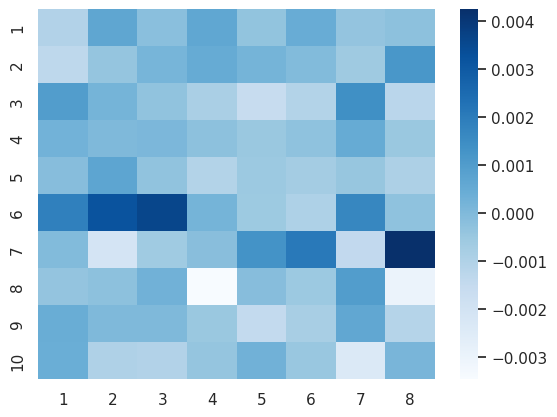

In [38]:
sns.heatmap(coef_model_ft.drop(columns='topic').T, annot=False, cmap='Blues');

In [39]:
coef_model_ft.to_excel('data/coefisien_model_ft.xlsx', index=False)

In [27]:
x = np.array(coef_model_ft.columns.values[1:], dtype='float32')
y = np.array(coef_model_ft.topic.values, dtype='float32')
X, Y = np.meshgrid(x, y)
Z = coef_model_ft.iloc[:, 1:].values

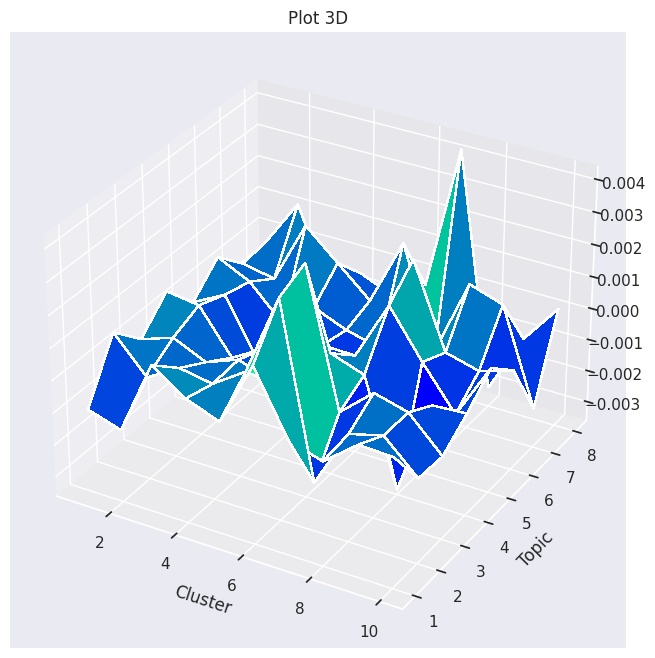

In [28]:
# membuat plot 3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_title('Plot 3D')
ax.set_xlabel('Cluster')
ax.set_ylabel('Topic')
ax.plot_surface(X, Y, Z, antialiased=False, cmap='winter');

#### Interpretasi Hasil : <br>
Topic 8 cluster word 7, which has the highest trend/upward trend. <br>
Topic 4 cluster word 8, which has a downward trend. <br>

In [29]:
df_top_words

1              2            3               4            5  \
0       student        student      student            soil      student   
1           low          power        power            life    algorithm   
2    percentage           work        level            bank  performance   
3         score     government       number       financial     analysis   
4         fiber         design       sample           local      control   
5         water       analysis       health      government     analysis   
6        farmer    performance   respondent         company         land   
7        member      character     sampling          social       specie   
8         value            dna      control         society       forest   
9          food       reaction  significant     institution    character   
10          map        process       school         islamic      variety   
11         year       strength  performance        economic   population   
12     analysis           part        group           stock        plant   
13       source           time     sampling           state         soil   
14    condition         primer    technique       political       number   
15       effect       sequence      teacher          market          per   
16      village           film        score           price      village   
17       period        already     hospital          policy    conducted   
18        model          novel     analysis     development         crop   
19         rate      technique       random        resource       family   
20    indonesia       material       factor  implementation    community   
21         loss            his   population          answer       income   
22        micro      determine   difference          income        level   
23       length          level         high            good        among   
24     spectral         income    treatment           right        field   
25       return           work        blood            side    diversity   
26  significant          model       people            full      regency   
27    indicator     respondent      disease          change       factor   
28      balance  questionnaire       stress         economy        yield   
29         seed          error      reading         regency   production   
30        waste         affect        flour         country         west   
31         show        analyze          dry            over         rice   
32      plastic           show         week         attempt         high   
33    component       observed    increased           islam       survey   
34      develop           form        level      indonesian      farming   

               6             7            8  
0        student          acid      student  
1          power         level      islamic  
2           test       control    indonesia  
3         sample          test         risk  
4    correlation        effect      article  
5     respondent   cholesterol      optimal  
6         factor   significant        model  
7       activity      variable        group  
8           mass          body        cycle  
9           test      increase       return  
10         group        design      banking  
11        sample        sample  development  
12      analysis   independent        state  
13       control      analyzed   indonesian  
14      sampling       patient       medium  
15   significant        health    technique  
16         child     treatment      ability  
17        health  introduction     material  
18          case       anxiety     analysis  
19           age    discussion       design  
20       pattern    respondent      english  
21          show       therapy      problem  
22    difference        weight        grade  
23       patient       disease  achievement  
24    instrument  significance      average  
25        sample       elderly     category  
26         score    prevention     

## Entropy

In [32]:
entropy_model_ft = model_TSED.get_entropy_topics(topic_results_ft)

In [33]:
entropy_model_ft.rename(rename_columns(entropy_model_ft, 1), axis=1, inplace=True)
entropy_model_ft.index = np.arange(1, len(entropy_model_ft) + 1)

In [40]:
entropy_model_ft

year         1         2         3         4         5         6  \
1   2023  0.906007  0.880524  0.675141  0.821355  0.795047  1.040045   
2   2022  0.777559  0.778826  0.851944  0.403830  1.041404  0.729543   
3   2021  0.894416  0.817135  0.807397  0.740301  0.609669  0.581055   
4   2020  0.626549  0.881996  0.983714  0.690579  0.607396  0.641910   
5   2019  0.885149  0.890548  0.647969  0.646028  0.732419  0.886752   
6   2018  1.042734  0.652829  0.729585  0.764713  0.442208  0.883521   
7   2017  0.836327  0.598413  0.556301  0.792967  0.850228  0.852425   
8   2016  0.765660  0.655578  0.858741  0.700069  1.094419  0.674863   
9   2015  0.822483  0.849032  1.096495  0.795978  0.458802  0.898419   
10  2014  0.761611  1.043714  0.705313  0.818337  0.873112  0.636814   
11  2013  1.015130  0.875607  0.774284  0.944210  0.671190  0.731779   
12  2012  0.966062  0.772251  0.652512  0.770400  0.761754  0.961909   
13  2011  0.587072  0.839010  0.682174  0.859543  0.811003  0.898374   
14  2010  0.683779  0.870801  0.736834  0.671782  1.011071  0.823137   
15  2009  0.959635  0.733327  0.870125  0.806144  0.937683  0.930322   

           7         8  
1   0.855168  0.514017  
2   0.824198  0.644638  
3   1.041017  0.906280  
4   0.970055  0.781646  
5   0.737231  1.042119  
6   0.868989  0.775950  
7   0.830556  1.100632  
8   0.719467  0.924571  
9   0.678091  0.781705  
10  0.579494  0.913731  
11  0.741711  0.777541  
12  0.994150  0.834542  
13  1.065753  0.872110  
14  0.996518  0.972687  
15  0.680349  0.721580

In [41]:
entropy_model_ft.to_excel('data/entropy_model_ft.xlsx', index=False)

## Visualize Entropy Topic 

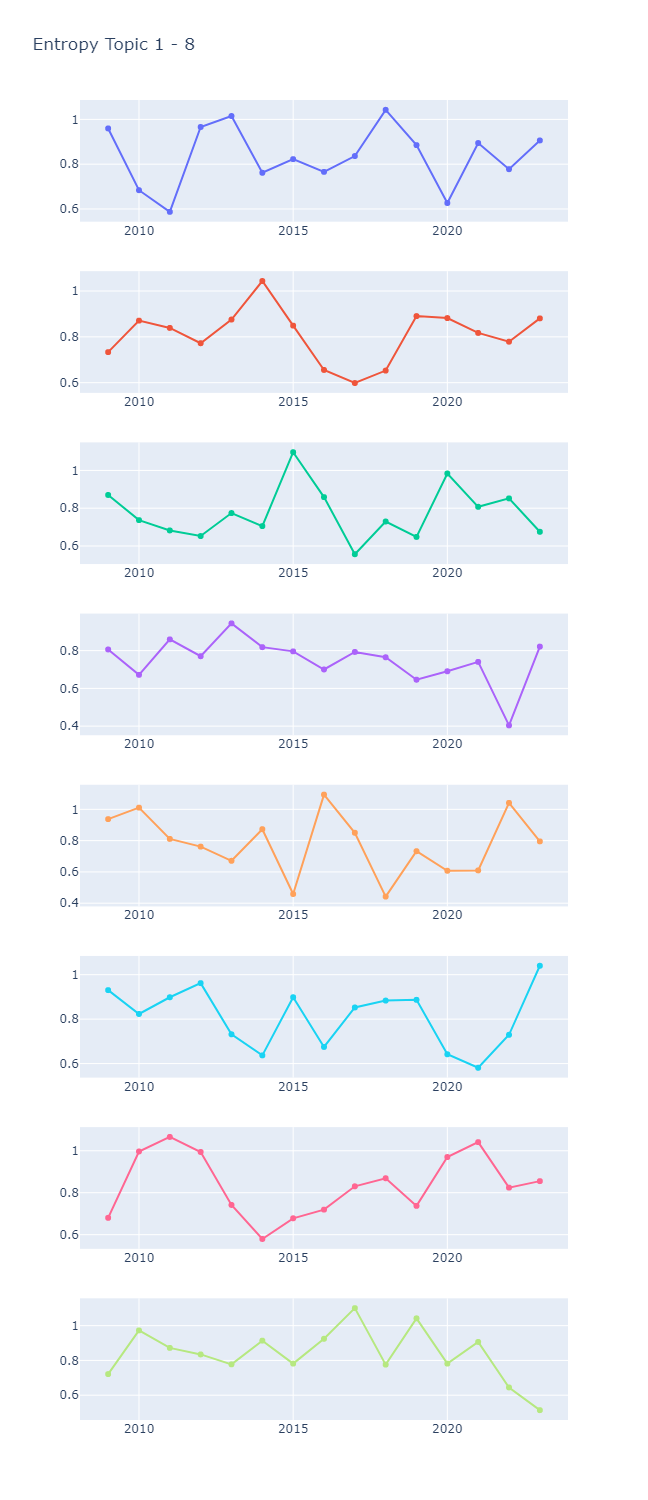

In [42]:
fig = make_subplots(rows=8, cols=1)
for i, j in enumerate(entropy_model_ft.columns[1:]):
    fig.add_trace(go.Scatter(x=entropy_model_ft['year'], y=entropy_model_ft[j], name=j), row=int(i)+1, col=1).update_layout(
            autosize=False, width=700, height=1500, showlegend=False, title='Entropy Topic 1 - 8'
        )
    
fig.show()

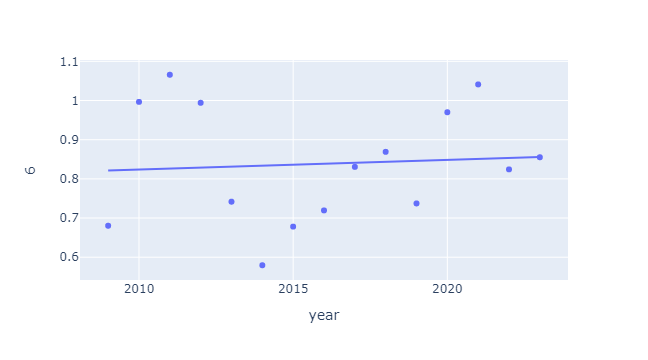

In [64]:
px.scatter(entropy_model_ft, x='year', y=6, trendline='ols')

#### Interpretation
Example interpretation and visualization, final interpretation in the paper. <br>
Topic 0 upward trend <br>
Topic 1 stagnant trend <br>
Topic 2 upward trend <br>
Topic 3 donwtrend <br>
Topic 4 donwtrend <br>
Topic 5 donwtrend <br>
Topic 6 upward trend <br>
Topic 7 donwtrend <br>

In [52]:
naik = entropy_model_ft[['year', 0, 2, 6]]
stagnan = entropy_model_ft[['year', 1]]
turun = entropy_model_ft[['year', 3, 4, 5, 7]]

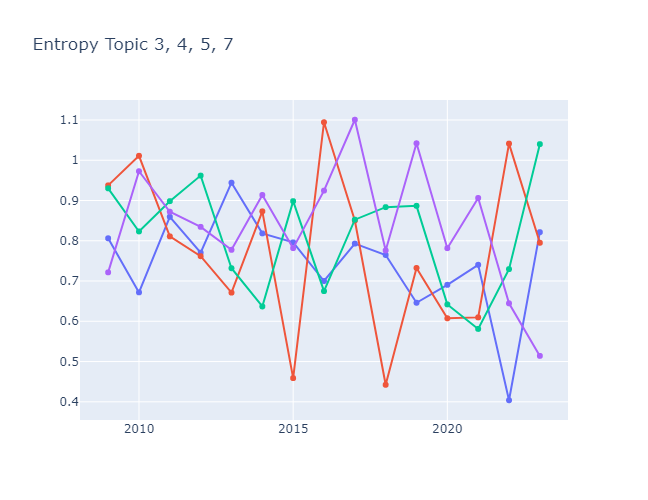

In [55]:
fig = make_subplots(rows=1, cols=1)
for i, j in enumerate(turun.columns[1:]):
    fig.add_trace(go.Scatter(x=entropy_model_ft['year'], y=entropy_model_ft[j], name=j), row=1, col=1).update_layout(
            autosize=False, width=500, height=500, showlegend=False, title='Entropy Topic 3, 4, 5, 7'
        )
    
fig.show()

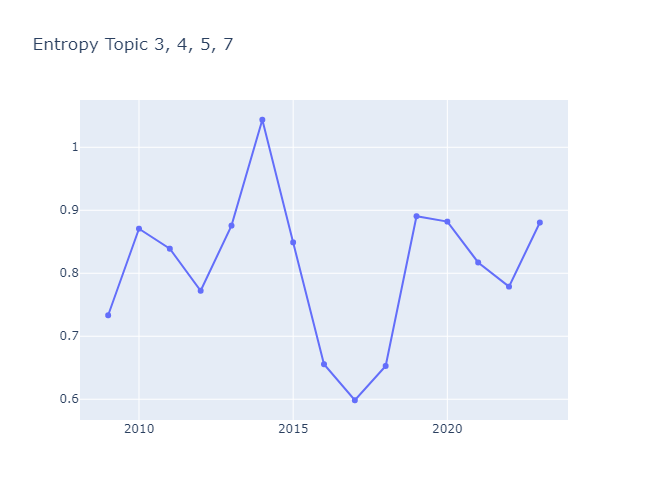

In [56]:
fig = make_subplots(rows=1, cols=1)
for i, j in enumerate(stagnan.columns[1:]):
    fig.add_trace(go.Scatter(x=entropy_model_ft['year'], y=entropy_model_ft[j], name=j), row=1, col=1).update_layout(
            autosize=False, width=500, height=500, showlegend=False, title='Entropy Topic 3, 4, 5, 7'
        )
    
fig.show()

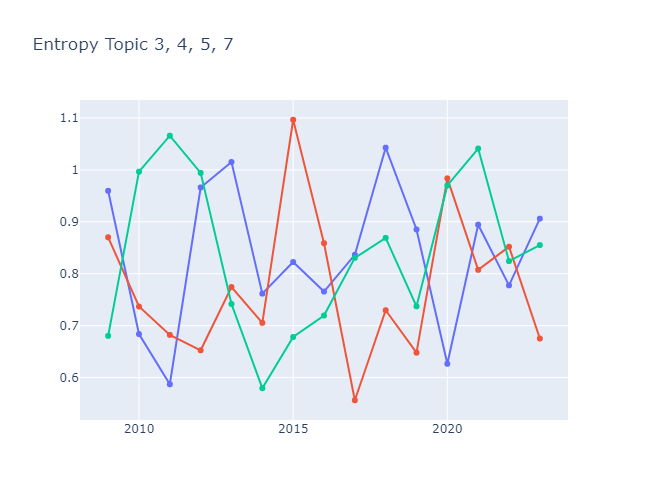

In [57]:
fig = make_subplots(rows=1, cols=1)
for i, j in enumerate(naik.columns[1:]):
    fig.add_trace(go.Scatter(x=entropy_model_ft['year'], y=entropy_model_ft[j], name=j), row=1, col=1).update_layout(
            autosize=False, width=500, height=500, showlegend=False, title='Entropy Topic 3, 4, 5, 7'
        )
    
fig.show()

## Visualize Intensity Topic 

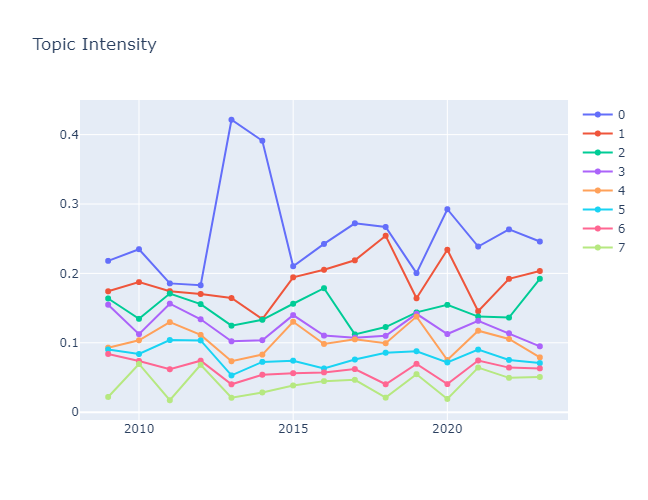

In [58]:
fig = make_subplots(rows=1, cols=1)
for h in df_intensity.columns[1:]:
    fig.add_trace(go.Line(x=df_intensity['year'], y=df_intensity[h], name=h), row=1, col=1).update_layout(
        autosize=False, width=650, height=500, showlegend=True, title='Topic Intensity'
    )
fig.show()